In [2]:
import pandas as pd
import os, sys
import numpy as np
sys.path.append('..')

from backtest.performance_generater import PerformanceGenerator
from backtest.operators import *

# path_data_path = os.path.join(os.path.dirname(os.path.dirname(os.getcwd())), 'Factor_data')

# Get Data

In [4]:
path_data_path = '/Volumes/Database/Factor_data'
file_list = os.listdir(path_data_path)
file_list

['open.csv',
 'high.csv',
 'low.csv',
 'close.csv',
 'volume.csv',
 'return.csv',
 '單月營收(千元)_90.csv',
 '去年單月營收(千元)_90.csv',
 '單月營收成長率％_90.csv',
 '單月營收與上月比％_90.csv',
 '單月營收與上月比％-成長月數_90.csv',
 '累計營收(千元)_90.csv',
 '去年累計營收(千元)_90.csv',
 '累計營收成長率％_90.csv',
 '歷史最高單月營收(千元)_90.csv',
 '歷史最高單月營收-年月_90.csv',
 '與歷史最高單月營收比%_90.csv',
 '歷史最低單月營收(千元)_90.csv',
 '歷史最低單月營收-年月_90.csv',
 '與歷史最低單月營收比%_90.csv',
 '創新高低(歷史)_90.csv',
 '創新高低(近一年)_90.csv',
 '創新高低(同月)_90.csv',
 '創 N月新高低 (月數)_90.csv',
 '近12月累計營收(千元)_90.csv',
 '去年近12月累計營收_90.csv',
 '近12月累計營收成長率_90.csv',
 '近 3月累計營收(千元)_90.csv',
 '去年近 3月累計營收_90.csv',
 '近3月累計營收成長率_90.csv',
 '近3月累計營收與上月比％_90.csv',
 '近3月累計營收變動率％_90.csv',
 '  現金及約當現金_90.csv',
 '單月稅前盈餘(千元)_90.csv',
 '  透過損益按公允價值衡量之金融資產－流動_90.csv',
 '去年單月稅前盈餘_90.csv',
 '  透過其他綜合損益按公允價值衡量之金融資產－流動_90.csv',
 '單月稅前盈餘成長率％_90.csv',
 '  按攤銷後成本衡量之金融資產－流動_90.csv',
 '累計稅前盈餘(千元)_90.csv',
 '  避險之金融資產－流動_90.csv',
 '去年累計稅前盈餘_90.csv',
 '  合約資產－流動_90.csv',
 '  應收帳款及票據_90.csv',
 '累計稅前盈餘成長率％_90.csv',
 '  其他應收款_90.csv',
 '單月

In [8]:
open = pd.read_csv(os.path.join(path_data_path, 'open.csv'), index_col=0)
close = pd.read_csv(os.path.join(path_data_path, 'close.csv'), index_col=0)
returns = pd.read_csv(os.path.join(path_data_path, 'return.csv'), index_col=0)

# 要再確認一下 報酬正確性
unadj_return = close.pct_change(fill_method=None).shift(-2) 
exp_returns = returns.shift(-2) * 0.01

# operatingmargin = pd.read_csv('/Volumes/Database/Factor_data/營業利益率_90.csv', index_col=0) * 0.01
# pb_q = pd.read_csv('/Volumes/Database/Factor_data/當季季底PB_90.csv', index_col=0)
# revenue_m = pd.read_csv('/Volumes/Database/Factor_data/以合併為主單月營收(千元)_90.csv', index_col=0)
# operatingincome = pd.read_csv('/Volumes/Database/Factor_data/營業利益_90.csv', index_col=0)
# operatingincome = pd.read_csv('/Volumes/Database/Factor_data/單月營業利益(千元)_90.csv', index_col=0)
# outstanding = pd.read_csv('/Volumes/Database/Factor_data/流通在外股數(千股).csv', index_col=0)
# CR = pd.read_csv('/Volumes/Database/Factor_data/流動比率_90.csv', index_col=0)
# CD = pd.read_csv('/Volumes/Database/Factor_data/流動負債_90.csv', index_col=0)
# CA = pd.read_csv('/Volumes/Database/Factor_data/流動資產_90.csv', index_col=0)
# inv = pd.read_csv('/Volumes/Database/Factor_data/  存貨_90.csv', index_col=0)
# totalD = pd.read_csv('/Volumes/Database/Factor_data/負債總額_90.csv', index_col=0)
# asset = pd.read_csv('/Volumes/Database/Factor_data/資產總額_90.csv', index_col=0)
# netasset = pd.read_csv('/Volumes/Database/Factor_data/淨值資產_90.csv', index_col=0)
# netdebt = pd.read_csv('/Volumes/Database/Factor_data/淨負債_90.csv', index_col=0)
# NI = pd.read_csv('/Volumes/Database/Factor_data/稀釋稅後淨利_90.csv', index_col=0)
# revenue_yoy = pd.read_csv('/Volumes/Database/Factor_data/單月營收成長率％_90.csv', index_col=0)
# DR = pd.read_csv('/Volumes/Database/Factor_data/負債比率_90.csv', index_col=0)


In [9]:
ZTXA_close = pd.read_csv(os.path.join(path_data_path, 'ZXTA_close.csv'), index_col=0)
ZTXA_close.index = pd.to_datetime(ZTXA_close.index)
market_returns = ZTXA_close['ZTXA'].pct_change()
Benchmark = ZTXA_close['ZTXA'].pct_change().shift(-2)

In [4]:
# factor = rolling_regression(operatingincome/asset, returns, 315, 'alpha')

# Backtest

## 息稅前利潤與營業總收入比

In [11]:
息稅前利潤 = pd.read_csv(os.path.join(path_data_path, '稅前息前淨利_90.csv'), index_col=0, parse_dates=True)
營業總收入 =  pd.read_csv(os.path.join(path_data_path, '營業收入淨額_90.csv'), index_col=0, parse_dates=True)

factor =  (息稅前利潤/營業總收入).replace([np.inf, -np.inf], np.nan)

# no fee
returns_by_period, summary_df = PerformanceGenerator(factor = factor,
                                                     expreturn = exp_returns,
                                                     strategy='LO',
                                                     buy_fee = 0, 
                                                     sell_fee = 0,
                                                     benchmark = Benchmark
                                                     ).backtest()

# fee
returns_by_period, summary_df = PerformanceGenerator(factor = factor,
                                                     expreturn = exp_returns,
                                                     strategy='LO',
                                                     benchmark = Benchmark
                                                     ).backtest()

+-------------+-----------------------+----------------------+--------------+----------------+--------------+------------+--------+----------+
|             | Cumprod Total Returns | Cumsum Total Returns | Sharpe Ratio | Annualized Ret | Max Drawdown | Volatility |  STD   | Turnover |
+-------------+-----------------------+----------------------+--------------+----------------+--------------+------------+--------+----------+
| Performance |       312.25 %        |       152.47 %       |     1.02     |    14.66 %     |   30.98 %    |  14.39 %   | 0.91 % |  0.39 %  |
|  Benchmark  |       145.24 %        |       103.31 %       |     0.62     |     9.05 %     |   31.51 %    |  16.17 %   | 1.02 % |   nan    |
+-------------+-----------------------+----------------------+--------------+----------------+--------------+------------+--------+----------+


+-------------+-----------------------+----------------------+--------------+----------------+--------------+------------+--------+----------+
|             | Cumprod Total Returns | Cumsum Total Returns | Sharpe Ratio | Annualized Ret | Max Drawdown | Volatility |  STD   | Turnover |
+-------------+-----------------------+----------------------+--------------+----------------+--------------+------------+--------+----------+
| Performance |       303.86 %        |       150.41 %       |     1.01     |    14.43 %     |   30.98 %    |  14.39 %   | 0.91 % |  0.39 %  |
|  Benchmark  |       145.24 %        |       103.31 %       |     0.62     |     9.05 %     |   31.51 %    |  16.17 %   | 1.02 % |   nan    |
+-------------+-----------------------+----------------------+--------------+----------------+--------------+------------+--------+----------+


In [12]:
csv_file = '/Volumes/Database/medina_alpha/EBITtoGrossRevenue.csv'
factor.to_csv(csv_file)

## 財務費用比率
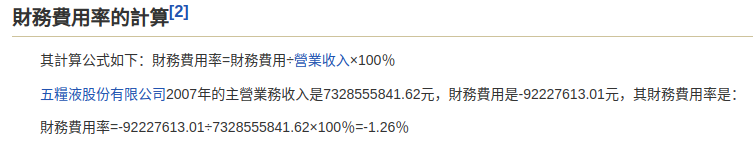
* 沒有財務費用

In [ ]:
[i for i in file_list if ('財務費用' in i)]

In [ ]:
財務費用 = ?
營業收入 =  pd.read_csv(os.path.join(path_data_path, '營業收入淨額_90.csv'), index_col=0)


factor =  (財務費用/營業收入).replace([np.inf, -np.inf], np.nan)

perf_genetator.set_factor(factor)
perf_genetator.set_strategy('LO')

# no fee
perf_genetator.backtest(is_fee = False);

# fee
perf_genetator.backtest(is_fee = True);

## 營業費用比例(%)
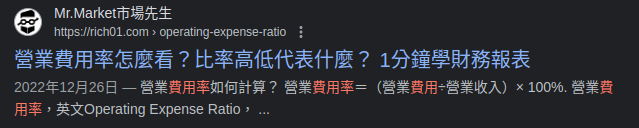

In [13]:
營業收入 = pd.read_csv(os.path.join(path_data_path, '營業收入淨額_90.csv'), index_col=0)
營業費用 = pd.read_csv(os.path.join(path_data_path, '營業費用_90.csv'), index_col=0)

factor =  (營業費用/營業收入).replace([np.inf, -np.inf], np.nan)

# no fee
returns_by_period, summary_df = PerformanceGenerator(factor = factor,
                                                     expreturn = exp_returns,
                                                     strategy='LO',
                                                     buy_fee = 0, 
                                                     sell_fee = 0,
                                                     benchmark = Benchmark
                                                     ).backtest()

# fee
returns_by_period, summary_df = PerformanceGenerator(factor = factor,
                                                     expreturn = exp_returns,
                                                     strategy='LO',
                                                     benchmark = Benchmark
                                                     ).backtest()

+-------------+-----------------------+----------------------+--------------+----------------+--------------+------------+--------+----------+
|             | Cumprod Total Returns | Cumsum Total Returns | Sharpe Ratio | Annualized Ret | Max Drawdown | Volatility |  STD   | Turnover |
+-------------+-----------------------+----------------------+--------------+----------------+--------------+------------+--------+----------+
| Performance |        12.59 %        |       52.49 %        |     0.18     |     1.15 %     |   59.43 %    |  28.02 %   | 1.77 % |  0.99 %  |
|  Benchmark  |       145.24 %        |       103.31 %       |     0.62     |     9.05 %     |   31.51 %    |  16.17 %   | 1.02 % |   nan    |
+-------------+-----------------------+----------------------+--------------+----------------+--------------+------------+--------+----------+


+-------------+-----------------------+----------------------+--------------+----------------+--------------+------------+--------+----------+
|             | Cumprod Total Returns | Cumsum Total Returns | Sharpe Ratio | Annualized Ret | Max Drawdown | Volatility |  STD   | Turnover |
+-------------+-----------------------+----------------------+--------------+----------------+--------------+------------+--------+----------+
| Performance |        7.03 %         |       47.41 %        |     0.16     |     0.66 %     |   59.43 %    |  28.02 %   | 1.76 % |  0.99 %  |
|  Benchmark  |       145.24 %        |       103.31 %       |     0.62     |     9.05 %     |   31.51 %    |  16.17 %   | 1.02 % |   nan    |
+-------------+-----------------------+----------------------+--------------+----------------+--------------+------------+--------+----------+


In [14]:
csv_file = '/Volumes/Database/medina_alpha/OperatingExpenseRatio.csv'
factor.to_csv(csv_file)

## 毛利率

In [16]:
毛利率 = pd.read_csv(os.path.join(path_data_path, '營業毛利率_90.csv'), index_col=0, parse_dates=True)
factor =  (毛利率).replace([np.inf, -np.inf], np.nan)

returns_by_period, summary_df = PerformanceGenerator(factor = factor,
                                                     expreturn = exp_returns,
                                                     strategy='LO',
                                                     buy_fee = 0, 
                                                     sell_fee = 0,
                                                     benchmark = Benchmark
                                                     ).backtest()

# fee
returns_by_period, summary_df = PerformanceGenerator(factor = factor,
                                                     expreturn = exp_returns,
                                                     strategy='LO',
                                                     benchmark = Benchmark
                                                     ).backtest()

+-------------+-----------------------+----------------------+--------------+----------------+--------------+------------+--------+----------+
|             | Cumprod Total Returns | Cumsum Total Returns | Sharpe Ratio | Annualized Ret | Max Drawdown | Volatility |  STD   | Turnover |
+-------------+-----------------------+----------------------+--------------+----------------+--------------+------------+--------+----------+
| Performance |       336.52 %        |       158.50 %       |     1.05     |    15.29 %     |   41.17 %    |  14.58 %   | 0.92 % |  0.43 %  |
|  Benchmark  |       145.24 %        |       103.31 %       |     0.62     |     9.05 %     |   31.51 %    |  16.17 %   | 1.02 % |   nan    |
+-------------+-----------------------+----------------------+--------------+----------------+--------------+------------+--------+----------+


+-------------+-----------------------+----------------------+--------------+----------------+--------------+------------+--------+----------+
|             | Cumprod Total Returns | Cumsum Total Returns | Sharpe Ratio | Annualized Ret | Max Drawdown | Volatility |  STD   | Turnover |
+-------------+-----------------------+----------------------+--------------+----------------+--------------+------------+--------+----------+
| Performance |       327.85 %        |       156.49 %       |     1.04     |    15.07 %     |   41.25 %    |  14.58 %   | 0.92 % |  0.43 %  |
|  Benchmark  |       145.24 %        |       103.31 %       |     0.62     |     9.05 %     |   31.51 %    |  16.17 %   | 1.02 % |   nan    |
+-------------+-----------------------+----------------------+--------------+----------------+--------------+------------+--------+----------+


In [17]:
csv_file = '/Volumes/Database/medina_alpha/GrossMargin.csv'
factor.to_csv(csv_file)

## ROA

In [19]:
ROA = pd.read_csv(os.path.join(path_data_path, 'ROA(A)稅後息前_90.csv'), index_col=0, parse_dates=True)
factor = ROA

returns_by_period, summary_df = PerformanceGenerator(factor = factor,
                                                     expreturn = exp_returns,
                                                     strategy='LO',
                                                     buy_fee = 0, 
                                                     sell_fee = 0,
                                                     benchmark = Benchmark
                                                     ).backtest()

# fee
returns_by_period, summary_df = PerformanceGenerator(factor = factor,
                                                     expreturn = exp_returns,
                                                     strategy='LO',
                                                     benchmark = Benchmark
                                                     ).backtest()

+-------------+-----------------------+----------------------+--------------+----------------+--------------+------------+--------+----------+
|             | Cumprod Total Returns | Cumsum Total Returns | Sharpe Ratio | Annualized Ret | Max Drawdown | Volatility |  STD   | Turnover |
+-------------+-----------------------+----------------------+--------------+----------------+--------------+------------+--------+----------+
| Performance |       589.24 %        |       205.07 %       |     1.31     |    20.49 %     |   30.80 %    |  15.15 %   | 0.95 % |  0.66 %  |
|  Benchmark  |       145.24 %        |       103.31 %       |     0.62     |     9.05 %     |   31.51 %    |  16.17 %   | 1.02 % |   nan    |
+-------------+-----------------------+----------------------+--------------+----------------+--------------+------------+--------+----------+


+-------------+-----------------------+----------------------+--------------+----------------+--------------+------------+--------+----------+
|             | Cumprod Total Returns | Cumsum Total Returns | Sharpe Ratio | Annualized Ret | Max Drawdown | Volatility |  STD   | Turnover |
+-------------+-----------------------+----------------------+--------------+----------------+--------------+------------+--------+----------+
| Performance |       566.47 %        |       201.70 %       |     1.29     |    20.10 %     |   30.80 %    |  15.14 %   | 0.95 % |  0.66 %  |
|  Benchmark  |       145.24 %        |       103.31 %       |     0.62     |     9.05 %     |   31.51 %    |  16.17 %   | 1.02 % |   nan    |
+-------------+-----------------------+----------------------+--------------+----------------+--------------+------------+--------+----------+


In [20]:
csv_file = '/Volumes/Database/medina_alpha/ROA.csv'
factor.to_csv(csv_file)

## ROE

In [22]:
ROA = pd.read_csv(os.path.join(path_data_path, 'ROE(A)－稅後_90.csv'), index_col=0, parse_dates=True)
factor = ROA

returns_by_period, summary_df = PerformanceGenerator(factor = factor,
                                                     expreturn = exp_returns,
                                                     strategy='LO',
                                                     buy_fee = 0, 
                                                     sell_fee = 0,
                                                     benchmark = Benchmark
                                                     ).backtest()

# fee
returns_by_period, summary_df = PerformanceGenerator(factor = factor,
                                                     expreturn = exp_returns,
                                                     strategy='LO',
                                                     benchmark = Benchmark
                                                     ).backtest()

+-------------+-----------------------+----------------------+--------------+----------------+--------------+------------+--------+----------+
|             | Cumprod Total Returns | Cumsum Total Returns | Sharpe Ratio | Annualized Ret | Max Drawdown | Volatility |  STD   | Turnover |
+-------------+-----------------------+----------------------+--------------+----------------+--------------+------------+--------+----------+
| Performance |       738.38 %        |       224.36 %       |     1.45     |    22.79 %     |   30.96 %    |  14.95 %   | 0.94 % |  0.65 %  |
|  Benchmark  |       145.24 %        |       103.31 %       |     0.62     |     9.05 %     |   31.51 %    |  16.17 %   | 1.02 % |   nan    |
+-------------+-----------------------+----------------------+--------------+----------------+--------------+------------+--------+----------+


+-------------+-----------------------+----------------------+--------------+----------------+--------------+------------+--------+----------+
|             | Cumprod Total Returns | Cumsum Total Returns | Sharpe Ratio | Annualized Ret | Max Drawdown | Volatility |  STD   | Turnover |
+-------------+-----------------------+----------------------+--------------+----------------+--------------+------------+--------+----------+
| Performance |       711.26 %        |       221.05 %       |     1.43     |    22.40 %     |   30.96 %    |  14.94 %   | 0.94 % |  0.65 %  |
|  Benchmark  |       145.24 %        |       103.31 %       |     0.62     |     9.05 %     |   31.51 %    |  16.17 %   | 1.02 % |   nan    |
+-------------+-----------------------+----------------------+--------------+----------------+--------------+------------+--------+----------+


In [23]:
csv_file = '/Volumes/Database/medina_alpha/ROE.csv'
factor.to_csv(csv_file)

## 銷售淨利率(%)

In [24]:
銷售 = pd.read_csv(os.path.join(path_data_path, '單月營收(千元)_90.csv'), index_col=0)
淨利 = pd.read_csv(os.path.join(path_data_path, '稅前淨利_90.csv'), index_col=0)
factor =  (銷售/淨利).replace([np.inf, -np.inf], np.nan)

returns_by_period, summary_df = PerformanceGenerator(factor = factor,
                                                     expreturn = exp_returns,
                                                     strategy='LO',
                                                     buy_fee = 0, 
                                                     sell_fee = 0,
                                                     benchmark = Benchmark
                                                     ).backtest()

# fee
returns_by_period, summary_df = PerformanceGenerator(factor = factor,
                                                     expreturn = exp_returns,
                                                     strategy='LO',
                                                     benchmark = Benchmark
                                                     ).backtest()

+-------------+-----------------------+----------------------+--------------+----------------+--------------+------------+--------+----------+
|             | Cumprod Total Returns | Cumsum Total Returns | Sharpe Ratio | Annualized Ret | Max Drawdown | Volatility |  STD   | Turnover |
+-------------+-----------------------+----------------------+--------------+----------------+--------------+------------+--------+----------+
| Performance |       587.38 %        |       214.04 %       |     1.02     |    20.46 %     |   49.08 %    |  20.25 %   | 1.28 % |  2.17 %  |
|  Benchmark  |       145.24 %        |       103.31 %       |     0.62     |     9.05 %     |   31.51 %    |  16.17 %   | 1.02 % |   nan    |
+-------------+-----------------------+----------------------+--------------+----------------+--------------+------------+--------+----------+


+-------------+-----------------------+----------------------+--------------+----------------+--------------+------------+--------+----------+
|             | Cumprod Total Returns | Cumsum Total Returns | Sharpe Ratio | Annualized Ret | Max Drawdown | Volatility |  STD   | Turnover |
+-------------+-----------------------+----------------------+--------------+----------------+--------------+------------+--------+----------+
| Performance |       514.31 %        |       202.79 %       |     0.97     |    19.16 %     |   49.89 %    |  20.25 %   | 1.28 % |  2.17 %  |
|  Benchmark  |       145.24 %        |       103.31 %       |     0.62     |     9.05 %     |   31.51 %    |  16.17 %   | 1.02 % |   nan    |
+-------------+-----------------------+----------------------+--------------+----------------+--------------+------------+--------+----------+


In [25]:
csv_file = '/Volumes/Database/medina_alpha/NetProfitMargin.csv'
factor.to_csv(csv_file)

### 補充其他淨利
* 每股稅前淨利

In [7]:
銷售 = pd.read_csv(os.path.join(path_data_path, '單月營收(千元)_90.csv'), index_col=0)
淨利 = pd.read_csv(os.path.join(path_data_path, '每股稅前淨利_90.csv'), index_col=0)
factor =  (銷售/淨利).replace([np.inf, -np.inf], np.nan)

perf_genetator.set_factor(factor)
perf_genetator.set_strategy('LO')

# no fee
perf_genetator.backtest(is_fee = False);

# fee
perf_genetator.backtest(is_fee = True);

+-------------+-----------------------+----------------------+--------------+----------------+--------------+------------+--------+----------+
|             | Cumprod Total Returns | Cumsum Total Returns | Sharpe Ratio | Annualized Ret | Max Drawdown | Volatility |  STD   | Turnover |
+-------------+-----------------------+----------------------+--------------+----------------+--------------+------------+--------+----------+
| Performance |       240.71 %        |       134.73 %       |     0.85     |    12.56 %     |   33.67 %    |  15.26 %   | 0.96 % |  1.87 %  |
|  Benchmark  |       145.24 %        |       103.31 %       |     0.62     |     9.05 %     |   31.51 %    |  16.17 %   | 1.02 % |   nan    |
+-------------+-----------------------+----------------------+--------------+----------------+--------------+------------+--------+----------+


+-------------+-----------------------+----------------------+--------------+----------------+--------------+------------+--------+----------+
|             | Cumprod Total Returns | Cumsum Total Returns | Sharpe Ratio | Annualized Ret | Max Drawdown | Volatility |  STD   | Turnover |
+-------------+-----------------------+----------------------+--------------+----------------+--------------+------------+--------+----------+
| Performance |       209.51 %        |       125.10 %       |     0.79     |    11.53 %     |   34.31 %    |  15.24 %   | 0.96 % |  1.87 %  |
|  Benchmark  |       145.24 %        |       103.31 %       |     0.62     |     9.05 %     |   31.51 %    |  16.17 %   | 1.02 % |   nan    |
+-------------+-----------------------+----------------------+--------------+----------------+--------------+------------+--------+----------+
